In [1]:
%load_ext zipline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


trading_calendar1: <<extension>.TwentyFourSevenCalendar object at 0x7f15435dadd0>
trading_calendar2: <<extension>.TwentyFourSevenCalendar object at 0x7f15435dadd0>
self.bm_symbol: BTC_USD
trading_calendar.day: <CustomBusinessDay>
trading_calendar.schedule.index: DatetimeIndex(['1990-01-01', '1990-01-02', '1990-01-03', '1990-01-04',
               '1990-01-05', '1990-01-06', '1990-01-07', '1990-01-08',
               '1990-01-09', '1990-01-10',
               ...
               '2019-01-20', '2019-01-21', '2019-01-22', '2019-01-23',
               '2019-01-24', '2019-01-25', '2019-01-26', '2019-01-27',
               '2019-01-28', '2019-01-29'],
              dtype='datetime64[ns, UTC]', length=10621, freq='C')


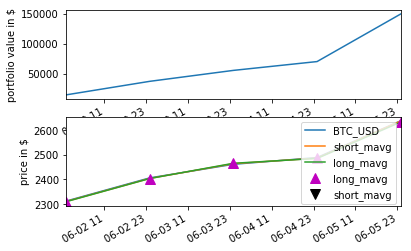

,BTC_USD,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_mavg,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2017-06-01 23:59:00+00:00,2312.0,5.361304,0.477623,0.000000,0.054829,0.615451,8.711178,-393696.970909,-3.836970e+05,3.984732e+05,...,2310.3600,0,0,None,1.000000e+04,0.000000e+00,0.000000e+00,1,"[{u'commission': None, u'amount': 1.5, u'sid':...",0.0
2017-06-02 23:59:00+00:00,2405.9,11.759154,2.731311,1138.639123,0.097670,0.159558,-73.698327,-239710.211585,-6.234072e+05,6.607203e+05,...,2403.8000,0,0,None,-3.836970e+05,3.984732e+05,3.984732e+05,2,"[{u'commission': None, u'amount': 1.0, u'sid':...",0.0
2017-06-03 23:59:00+00:00,2461.0,9.555243,4.551254,188.736330,0.122809,0.253917,2.059424,-177016.080776,-8.004233e+05,8.559358e+05,...,2463.5362,0,0,None,-6.234072e+05,6.607203e+05,6.607203e+05,3,"[{u'commission': None, u'amount': 1.0, u'sid':...",0.0
2017-06-04 23:59:00+00:00,2488.2,9.001902,6.019159,77.891004,0.135218,0.306237,11.736298,-256601.946838,-1.057025e+06,1.127217e+06,...,2485.9000,0,0,None,-8.004233e+05,8.559358e+05,8.559358e+05,4,"[{u'commission': None, u'amount': 1.1, u'sid':...",0.0
2017-06-05 23:59:00+00:00,2636.9,8.395106,13.933290,69.544136,0.203061,0.328952,13.230486,-412434.798384,-1.469460e+06,1.618793e+06,...,2636.0000,0,0,None,-1.057025e+06,1.127217e+06,1.127217e+06,5,"[{u'commission': None, u'amount': 1.15, u'sid'...",0.0


In [2]:
%%zipline -b custom-csvdir-bundle --trading-calendar TWENTYFOURSEVEN --data-frequency minute --start 2017-6-1 --end 2017-6-5 --capital-base 10000 -o short_long_btc.pickle


from zipline.api import order_target, record, symbol, set_benchmark
import matplotlib.pyplot as plt

def initialize(context):
    set_benchmark(symbol('BTC_USD'))
    context.i = 0
    context.asset = symbol('BTC_USD')


def handle_data(context, data):
    # Skip first 10 mins to get full windows
    context.i += 1
    if context.i < 10:
        return

    # Compute averages
    # data.history() has to be called with the same params
    # from above and returns a pandas dataframe.
    short_mavg = data.history(context.asset, 'price', bar_count=5, frequency="1m").mean()
    long_mavg = data.history(context.asset, 'price', bar_count=10, frequency="1m").mean()

    # Trading logic
    if short_mavg > long_mavg:
        # order_target orders as many shares as needed to
        # achieve the desired number of shares.
        order_target(context.asset, 100)
    elif short_mavg < long_mavg:
        order_target(context.asset, 0)

    # Save values for later inspection
    record(BTC_USD=data.current(context.asset, 'price'),
           short_mavg=short_mavg,
           long_mavg=long_mavg)


def analyze(context, perf):
    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    perf.portfolio_value.plot(ax=ax1)
    ax1.set_ylabel('portfolio value in $')

    ax2 = fig.add_subplot(212)
    perf['BTC_USD'].plot(ax=ax2)
    perf[['short_mavg', 'long_mavg']].plot(ax=ax2)

    perf_trans = perf.ix[[t != [] for t in perf.transactions]]
    buys = perf_trans.ix[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
    sells = perf_trans.ix[
        [t[0]['amount'] < 0 for t in perf_trans.transactions]]
    ax2.plot(buys.index, perf.long_mavg.ix[buys.index],
             '^', markersize=10, color='m')
    ax2.plot(sells.index, perf.short_mavg.ix[sells.index],
             'v', markersize=10, color='k')
    ax2.set_ylabel('price in $')
    plt.legend(loc=0)
    plt.show()